# Задача 1.  МНК или SVD.

**Облако точек.**

Скачайте файл, содержащий координаты облака точек в трехмерном пространстве, и распакуйте его с помощью numpy:
with np. load('data_distance_svd.npz') as data:
$$
x p, y p, z p=\text { data }\left[' x p^{\prime}\right], \text { data['yp'], data ['zp'] }
$$
Массивы содержат координаты точек: первая точка имеет координаты (хр [0], ур [0], zр [0] ), вторая точка - координаты $(\mathrm{xp}[1], \mathrm{yp}[1], \mathrm{zp}[1])$ и т.д. Нарисуйте точки на трехмерном графике. Можно заметить, что точки группируются вблизи некоторой плоскости. Задача состоит в том, чтобы построить данную плоскость. В качестве критерия выберем следующий: назовем наилучшей такую плоскость, что сумма квадратов ортогональных расстояний от точек до этой плоскости минимальна. 

- Изобразите найденную плоскость на трёхмерном графике с облаком точек. 
- Вычислите сумму квадратов расстояний точек до плоскости. 
- Найдите другую плоскость, которая соответствует минимуму сумм квадратов $(f(x_p, y_p)-z_p)^2$, где $f(x, y) = z$ - уравнение плоскости. Тоже изобразите ее на трехмерном графике с облаком точек. Вычислите для нее сумму квадратов расстояний точек до плоскости.
- Вычислите для обеих плоскостей сумму квадратов $(f(x_p, y_p)-z_p)^2$



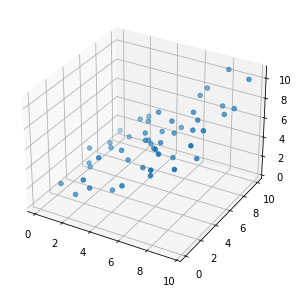

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Загружаем данные

with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

data = np.vstack((xp, yp, zp))
A = []
B = []

for i in range(50):
    A.append([xp[i], yp[i], i])  # Реализуем матричное представление данных  
    B.append(zp[i])
# здесь мог бы быть ваш код  

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')  # строим плоскость
# ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xp, yp, zp)
plt.show()

Ортогональные расстояния минимизуются при помощи метода главных компонент

[0.67465    0.23135789 0.70094287] [-0.27939059  0.95899585 -0.04762214]


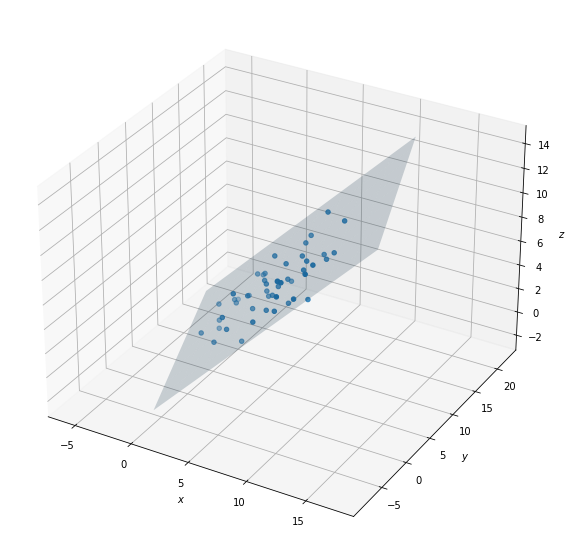

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
X = standart_scaler.fit_transform(data.T) # приводим данные к нормлаьному виду
pca = PCA(n_components=3)
pca.fit(X)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

sv_0, sv_1 = pca.components_[0], pca.components_[1]
print(sv_0, sv_1)

plane = []
xx, yy, z = [], [], []
N = 10
for i in range(N):
    xx.append([])
    yy.append([])
    z.append([])
    for j in range(N):
        point = sv_0 * (N//2 - i) + sv_1 * (N // 2 - j)
        plane.append(point)
        xx[i].append(point[0])
        yy[i].append(point[1])
        z[i].append(point[2])

xx = np.array(xx)
yy = np.array(yy)
z = np.array(z)
        
plane = np.array(plane)    
plane = standart_scaler.inverse_transform(plane) # обратное преобразование
X = standart_scaler.inverse_transform(X)
xx = plane[:, 0].reshape((N, N))
yy = plane[:, 1].reshape((N, N))
z = plane[:, 2].reshape((N, N))

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.plot_surface(xx, yy, z, alpha=0.2)


ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
    
plt.show()

Решим вторую задачу

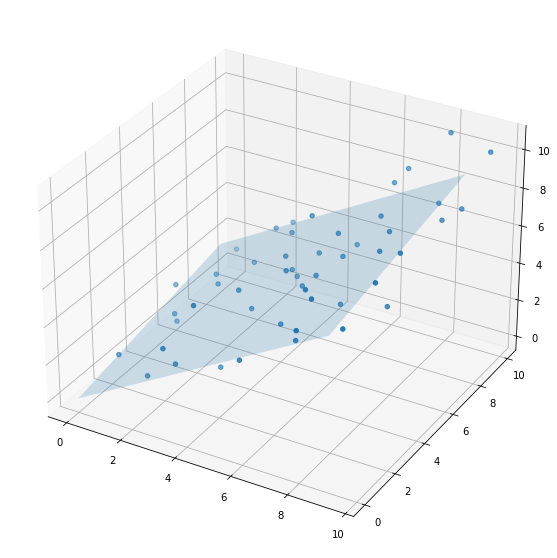

In [55]:
data = np.vstack((xp, yp, zp))
A = []
B = []

for i in range(50):
    A.append([xp[i], yp[i], i])  
    B.append(zp[i])
    
solution = np.linalg.lstsq(np.matrix(A), np.matrix(B).T, rcond=None)

fig = plt.figure(figsize=(10, 10))
xx, yy = np.meshgrid(range(10), range(10))
z = (float(solution[0][0]) * xx + float(solution[0][1]) * yy + float(solution[0][2]))
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xp, yp, zp)
plt.show()

# Задание 2. Погрешности.

Рассмотрим два тела массами $M_{1}$ и $M_{2}$, расположенных на расстоянии $r$ друг от друга, соединенных пружинами. Сила упругости пружины
$$
F=k*(r-r_0)
$$ 

Предположим, что значения масс известны с погрешностями измерений:
$$
\begin{aligned}
&M_{1}=40  \pm 1.5 \times 10^{-2} \mathrm{~kg} \\
&M_{2}=30  \pm 1.1 \times 10^{-1} \mathrm{~kg}
\end{aligned}
\\
$$
и $r0=3.2 \pm 0.01 \mathrm{~cm}$. Значение жесткости принимаем точно равным k = 1000 Н/м.

(a) Используя стандартные правила вычисления погрешностей, вычислите значение и погрешность силы взаимодействия $F$.

(b) Пусть в начальный момент времени первому телу придали скорость 20 см/c в направлении растяжения пружины. Чему равно максимальное значение потенциальной энергии пружины в ходе движения? 

(с) Будем интерпретировать заданное значение с погрешностью как нормальное распределение с заданным средним и стандартным отклонением. Сгенерируйте $10^{5}$ случайных значений каждого из параметров, согласно заданным значениям. Для каждого набора реализаций вычислите  максимальное значение потенциальной энергии пружины в ходе движения. Начальную скорость тоже генерировать - со средним 20 см/c и стандартным отклонением 1 см/c.

(d) Постройте гистограмму (plt.hist) максимальных значений потенциальной энергии пружины и график нормального распределения со средним и дисперсией из предыдущего пункта. (Результаты должны получиться согласованными).




In [59]:
import numpy as np

M1 = 40
M2 = 30
r0 = 3.2
dM1 = 1.5e-2
dM2 = 1.1e-1
dr0 = 0.01
k = 10

def raschet_a(r0, dr0, r, k):
    F = k * (r - r0)
    eF = ((dr0/r0)**2)**(0.5)
    dF = F * eF
    return F, dF, eF

print(raschet_a(r0, dr0, 1, k))

(-22.0, -0.06874999999999999, 0.0031249999999999997)


In [60]:
def raschet_b(M1, M2, dM1, dM2, r0, dr0, v0, dv0, k):
    v = M1*v0/(M1+M2)
    dM12 = (M1+M2)*((dM1/M1)**2+(dM2/M2)**2)**(0.5)
    dv = ((dM1*v0/(M1+M2))**2+(M1*v0*dM12/(M1+M2)**2)**2+(M1*dv0/(M1+M2))**2)**(0.5)
    E = (M1*v0**2-(M1+M2)*v**2)/2
    eE = 1/4 * ((dM1/M1)**2+4*(dv0/v0)**2+(dM12/(M1+M2))**2+4*(dv/v)**2)**(0.5)
    dE = E * eE
    return E, dE, eE

print(raschet_b(M1, M2, dM1, dM2, r0, dr0, 20, 0, k))

(3428.5714285714284, 7.100768857479234, 0.002071057583431443)


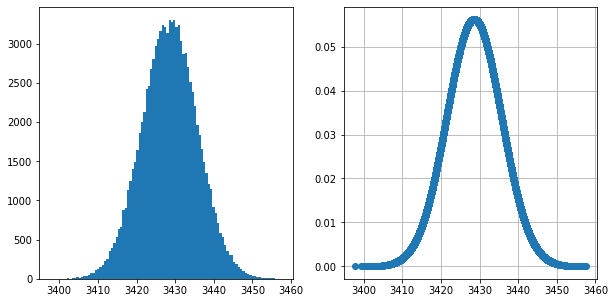

In [76]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

r = 4
v0=20
dv0=1

M1_norm=norm.rvs(M1,dM1,100000)
M2_norm=norm.rvs(M2,dM2,100000)
r0_norm=norm.rvs(r,dr0,100000)
v0_norm=norm.rvs(v0,dv0,100000)

E_norm, dE_norm, eE_norm = raschet_b(M1_norm, M2_norm, dM1, dM2, r0_norm, dr0, v0, dv0, k)
E, dE, eE = raschet_b(M1,M2,dM1,dM2,r0,dr0,v0,0,k)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(E_norm, bins=100)
plt.subplot(122)
plt.plot(E_norm, norm.pdf(E_norm,E,dE), "o")
plt.grid()

# Задача 3.  Спектры.

Рассмотрите матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+k*\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите псевдоспектр матрицы $A$ при разных k, k = 1, 5, 10, 20. 
- Постройте эти псевдоспектры в виде точек на комплексной плоскости.

Чтобы построить псевдоспектр, добавляйте к матрице А случайную матрицу небольшой нормы. Используйте по 10 возмущенных матриц для каждого построения.


In [80]:
import numpy as np
from scipy.sparse import spdiags

def create_matrixA(n, k):
    d, d1, d2 = -np.ones(n), k * np.ones(n), np.ones(n)
    diags, data = np.array([0, 1, 2]), [d, d1, d2]
    A = spdiags(data, diags, n, n).toarray()
    return(A)

def random_matrix(n, eps):
    return np.random.normal(0, eps, size=(n, n))

print(create_matrixA(32, 5))

[[-1.  5.  1. ...  0.  0.  0.]
 [ 0. -1.  5. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  5.  1.]
 [ 0.  0.  0. ...  0. -1.  5.]
 [ 0.  0.  0. ...  0.  0. -1.]]


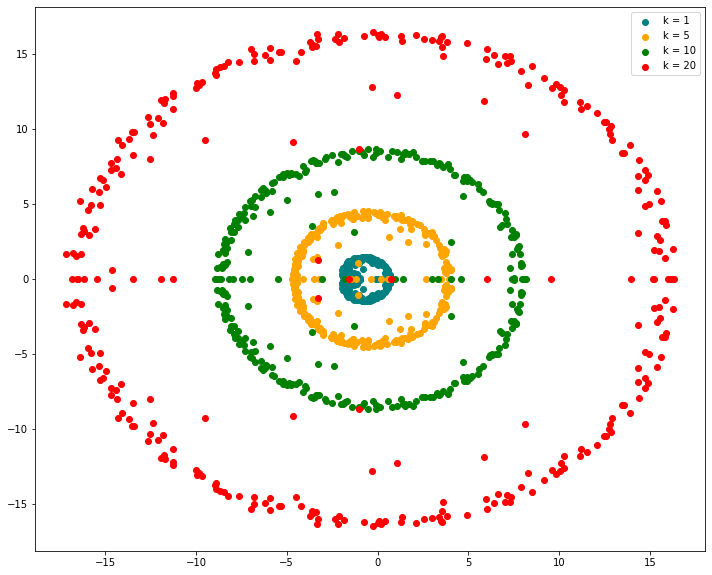

In [94]:
plt.figure(figsize=(12, 10))

colors = ["teal", "orange", "green", "red"]
ks = [1, 5, 10, 20]
for k, color in zip(ks, colors):
    plt.scatter([], [], label=f"k = {k}", color=color)
    for _ in range(10):
        eigw, eigv = np.linalg.eig(create_matrixA(32, k) + random_matrix(32, 0.01))
        plt.scatter(np.real(eigw), np.imag(eigw), color=color)
    
plt.legend()

# Задача 4. Итерации.


Реализуйте метод простой итерации для нахождения решения следующих уравнений относительно $x$ :

(i) $1+\cos x=0$

(ii) $x^2=2$.

Используйте следующие итерационные формулы:

(i) $x_{k+1}=x_k+\frac{\cos x_k+1}{\sin x_k}$

(ii) $x_{k+1}=\frac{1}{2}\left(x_k+\frac{2}{x_k}\right)$.

В обоих случаях, стартуйте с $x_0=1$. Какова сходимость итераций (линейная/квадратичная) для случаев (i) и (ii)?

In [140]:
def iter_step_1(x):
    return x + (np.cos(x) + 1)/np.sin(x)

def iter_step_2(x):
    return (x + 2/x) / 2

def iterate_1(x_0, rcond=1e-10, max_iter=100):
    xs = [x_0]
    x = iter_step_1(x_0)
    xs.append(x)
    for _ in range(max_iter):
        x_new = iter_step_1(x)
        xs.append(x_new)
        if np.abs(x_new - x) < rcond:
            x = x_new
            break
        x = x_new
    return x, xs

def iterate_2(x_0, rcond=1e-10, max_iter=100):
    x = iter_step_2(x_0)
    xs = [x_0 ,x]
    for _ in range(max_iter):
        x_new = iter_step_2(x)
        xs.append(x_new)
        if np.abs(x_new - x) < rcond:
            x = x_new
            break  
        x = x_new
    return x, xs

In [141]:
print(iterate_1(1)[0], iterate_1(7)[0])
print(iterate_2(1)[0], iterate_2(-1)[0])

3.14159264636329 9.424777966597905
1.414213562373095 -1.414213562373095


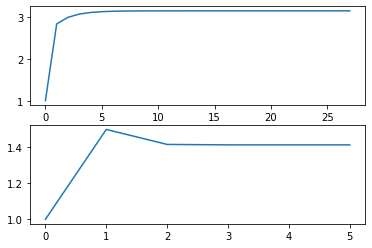

In [142]:
x_1, xs_1 = iterate_1(1)
x_2, xs_2 = iterate_2(1)
plt.subplot(211)
plt.plot(np.arange(len(xs_1)), xs_1)
plt.subplot(212)
plt.plot(np.arange(len(xs_2)), xs_2)


Видим, что в зависимости от выбора начальной точки уравнения имеют разные корни  
Из графика можно заключить, что косинус сходится линейно, а квадрат квадратично

# Задача 5. Одномерный кристалл.

**Одномерный кристалл.** 

Рассмотрите одномерный кристалл с двумя атомами различной массы  $m$  и $M$   в элементарной ячейке, состоящий из $N$ элементарных ячеек (всего $2 N$ атомов), замкнутых в кольцо (периодические граничные условия).
- Считая, что соседние атомы на кольце соединены одинаковыми пружинами с упругой константой $k=1$, выпишите уравнения движения (уравнения Ньютона) на положения атомов $x_{i} .$
- Предполагая, что все атомы движутся с одной и той же частотой, $x_{i}(t)=u_{i} e^{-i \omega t}$, перепишите найденные выше уравнения в виде системы линейных уравнений на вектор u. Составьте матрицу A, спектр которой определяет частоты нормальных мод.
- Используя np. linalg.eig, найдите спектр матрицы $A$ (возьмите $N=100$ и $M / m=2$ ). Постройте гистограмму собственных значений. Обратите внимание, что в спектре есть щель - 'запрещенная' область энергии внутри спектра, которая разделяет 'разрешенную' область на две части.
- Постройте график зависимости ширины запрещенной зоны от $M / m$.
- Собственные векторы здесь соответствуют стоячим волнам. Постройте какое-нибудь одно решение в виде бегущей волны для $M / m=1$. Можете искать его в виде $u_i = A*cos(w*t - i*p) $. Изобразите пространственную структуру $u$ в разные моменты времени.

**Решение.**

\begin{aligned}
&m_{i}= \begin{cases}m,  \text { i чётное } \\ \text { M, i  нечётное }\end{cases}\\
&m_{i} \ddot{x}=k\left(x_{i+1}-x_{i}\right)-k\left(x_{i}-x_{i-1}\right)
\end{aligned}

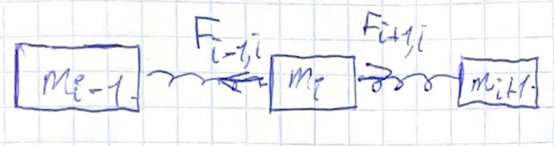  


После подстановки u в уравнения получается система линейных уравнений с нулевой правой частью, матрица B которой имеет вид: 

$b_{2} \in(1, \ldots, 2 N-2)$:
$b_{i i}=m_{i} w^{2}-2 k$ \
$b_{i i-1}=k ;\ b_{i, i+1}=k$;

$i=2 N - 1: \ b_{2 N - 1, 2 N - 2}=k$;  
$b_{2 N - 1, 2 N - 1}=m_{i} w^{2}-2 k$;  
$b_{2 N - 1, 0}=k ;$

$b_{00}=m_{0} w^{2}-2 k$;\
$b_{01}=k$; \
$b_{02 N-1}=k$ 

Определитель этой матрицы равен нулю - это условие нахождения частот.


$A=\frac{-B}{m_{i}}+\lambda E \quad, \quad \lambda=\omega^{2}$

$\left[   
\quad a_{i i-1}=\frac{k}{m_{i}}\right.$
$a_{i i}=\frac{2 k}{m_{i}}, \quad a_{i i+1}=\frac{k}{m_{i}}$

${a}_{00}=\frac{2 k}{m_{0}} ;  \quad a_{0 1}=\frac{k}{m_{0}}; $
$a_{0,2 N-1}=\frac{k}{m_{0}}$

${a}_{2 N-1, 2 N-1}=\frac{2 k}{m_{2 N-1}} ;  \quad a_{2 N-1, 0}=\frac{k}{m_{0}}; $
$a_{2 N-1, 2 N-2}=\frac{k}{m_{0}}$

Умножим все элементы матрицы на M, получаем:


$$A=k \cdot\left(\begin{array}{ccccccc}
2 \kappa & -\kappa & 0 & & 0 & 0 & -\kappa \\
-1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
0 & -\kappa & 2 \kappa & & 0 & 0 & 0 \\
& \vdots & & \ddots & & \vdots & \\
0 & 0 & 0 & & 2 & -1 & 0 \\
0 & 0 & 0 & \cdots & -\kappa & 2 \kappa & -\kappa \\
-1 & 0 & 0 & & 0 & -1 & 2
\end{array}\right) $$

In [146]:
import numpy as np
from scipy.sparse import spdiags

def create_matrixA(N, k, kappa):
    n = 2*N
    d, d1, d2 = np.zeros(n), np.zeros(n), np.zeros(n)
    d[0:n:2] += 2*kappa; d[1:n:2] += 2
    d1[0:n:2] += -1;      d1[1:n:2] += -kappa
    d2[0:n:2] += -1;     d2[1:n:2] += -kappa
    diags, data = np.array([0, -1, 1]), [d, d1, d2]
    A = spdiags(data, diags, n, n).toarray()
    A[0,n-1], A[n-1, 0] = -kappa, -1
    return(k*A)
print(create_matrixA(3, 1, 1))


[[ 2. -1.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0. -1.  2.]]


/tmp/ipykernel_27498/2998499703.py:7: RuntimeWarning: invalid value encountered in double_scalars
  wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]


[nan, 1.9447398407953502, 1.9584456212435393, 2.0000000000000018, 1.9645745014573832, 1.9518335238774878, 1.975376681190274, 1.9702186523095437, 1.9997532649633236, 1.9997532649633165, 1.9990131207314639, 1.999013120731464, 1.9977797499239422, 1.9977797499239403, 1.9960534568565467, 1.9960534568565502, 1.9800473154331188, 1.99383466746626, 1.9938346674662644, 1.991123929206163, 1.9911239292061576, 1.987921910910358, 1.9879219109103758, 1.9842294026289589, 1.984229402628959, 1.9800473154331282, 0.21946862218208518, 0.15691819145568642, 0.1882166266370182, 0.188216626637032, 0.12558103905862597, 0.12558103905862378, 0.03141463462362022, 0.03141463462365233, 0.06282151815625275, 0.06282151815625295, 0.09421290141928872, 0.09421290141929248, 0.2818024638751663, 0.25066646712860746, 1.9753766811902904, 0.15691819145568806, 1.9518335238774944, 1.9584456212435355, 1.9645745014573803, 1.9702186523095402, 0.21946862218209295, 1.9371663222572633, 0.2506664671286142, 1.9291148369155997, 1.9447398

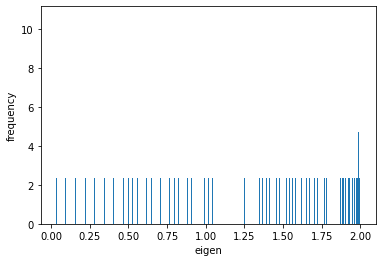

In [148]:
import matplotlib.pyplot as plt
import numpy as np
N = 100
k = 1; kappa = 1
A = create_matrixA(N, k, kappa)
w, v = np.linalg.eig(A) # собственные значения w и векторы v
wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]
print(wr)
plt.hist(wr, density=True, bins=462)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('eigen')
print(len(wr))

2000
k =  3.496683662487006
Ширина запрещенной зоны: 1.1004866754697828


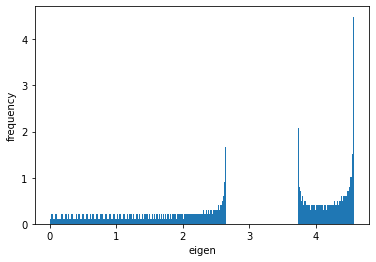

In [170]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N = 1000
k = np.random.default_rng().uniform(1.0, 10.0)
kappa = 2
A = create_matrixA(N, k, kappa)
w, v = np.linalg.eig(A) # собственные значения w и векторы v
wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]
# print(wr)
n, bins, _ = plt.hist(wr, density=True, bins=462)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('eigen')
print(len(wr))
print('k = ', k)
print("Ширина запрещенной зоны:", np.max(bins[:-1][n != 0][1:] - bins[:-1][n != 0][:-1])) # максимальная разность между ненулевыми столбцами

In [166]:
print(bins.size)

463


/tmp/ipykernel_27498/1648712192.py:12: RuntimeWarning: invalid value encountered in double_scalars
  wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]


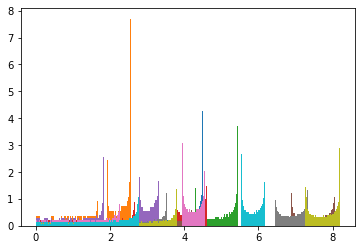

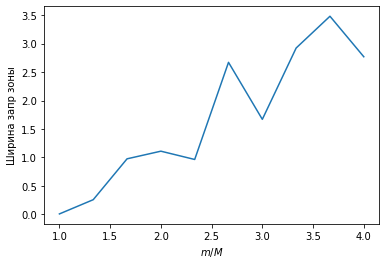

In [169]:
import matplotlib.pyplot as plt
import numpy as np

kappas = np.linspace(1, 4, 10)
band_width = []

for kappa in kappas:
    N = 1000
    k = np.random.default_rng().uniform(1.0, 10.0)
    A = create_matrixA(N, k, kappa)
    w, v = np.linalg.eig(A) # собственные значения w и векторы v
    wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]
    n, bins, _ = plt.hist(wr, density=True, bins=462)
    band_width.append(np.max(bins[:-1][n != 0][1:] - bins[:-1][n != 0][:-1]))

plt.show()
plt.plot(kappas, band_width)
plt.xlabel("$m/M$")
plt.ylabel("Ширина запр зоны")
plt.show()